<p><img alt="Colaboratory logo" width="100" height="130" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" align="left" hspace="10px" ></p>

<h1><b>Tarea 3: Física experimental <b></h1>

----
<div align="right">
<font size=3>
José David Bernal Restrepo <br>
Instituto de física
</font>
</div>

En esta práctica se estudiará de nuevo el sistema de péndulo simple. A partir del análisis de sus datos, debe
reportar un valor experimental de la aceleración gravitacional en el laboratorio usando la metodología de
regresión y ajuste de datos experimentales.

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import and fix data
data= pd.read_csv(r'../data/processed/Medida_periodo_pendulos.csv') 
data['T(s)'] = data['5 T(s)']/5 # splitting multiple osilations
data.drop(columns=['5 T(s)'], inplace=True)


## 1. Medidas de longitud

En el curso de nuestra investigación, fue fundamental llevar a cabo mediciones de las oscilaciones de péndulos, un aspecto crucial para comprender y analizar el comportamiento de estos sistemas físicos. Para ello, seleccionamos cuidadosamente una serie de longitudes específicas que se utilizaron como parámetros de estudio en nuestro experimento. Estas longitudes se convirtieron en puntos de referencia cruciales para explorar cómo variaba el comportamiento de los péndulos en función de su extensión.

Las longitudes que tomamos en consideración en nuestra investigación fueron las siguientes:
- $(56.2\pm 0.1)cm$
- $(72.8\pm 0.1)cm$
- $(77.3\pm 0.1)cm$
- $(39.4\pm 0.1)cm$
- $(16.5\pm 0.1)cm$
- $(33.0\pm 0.1)cm$
- $(62.5\pm 0.1)cm$
- $(91.2\pm 0.1)cm$
- $(25.9\pm 0.1)cm$


## 2. Medidas de periodo

En este estudio, hemos seguido una estrategia de recopilación de datos similar a la que se ha empleado en trabjos previos. Nuestra metodología se centra en medir el período de oscilación de péndulos en múltiples repeticiones, con el objetivo de minimizar los posibles errores humanos inherentes al proceso de toma de datos. Además, hemos mantenido un enfoque en el uso de ángulos pequeños durante las oscilaciones, lo que nos permite conservar la relación fundamental entre el período y la longitud del péndulo.

Este enfoque riguroso nos ha permitido obtener datos confiables. Sin embargo, es importante mencionar que, incluso con esta cuidadosa estrategia de medición, existe una fuente de incertidumbre asociada a errores sistematicos en la medición, considerando la incertidumbre estandar, el error instrumental y errores sistematicos reportaremos la incertidumbre del periodo cómo: $S_T = 0.02 s$. y repotamos el periodo cómo $T = \bar{t} + S_T$


In [154]:
longitudes = data['l (cm)'].unique()
periodos = {} #Valores a reportar

i = 0

for longitud in longitudes:
    mean = np.mean(data[data['l (cm)'] == longitud]['T(s)'])
    periodos[i] = [longitud, mean]
    i+=1

for i in range(len(periodos)):
    print(f'Para l = {periodos[i][0]} cm, el periodo del pendulo asociado es: ({np.round(periodos[i][1], 2)}  ± 0.02) s')

Para l = 56.2 cm, el periodo del pendulo asociado es: (1.48  ± 0.02) s
Para l = 72.8 cm, el periodo del pendulo asociado es: (1.68  ± 0.02) s
Para l = 77.3 cm, el periodo del pendulo asociado es: (1.73  ± 0.02) s
Para l = 39.4 cm, el periodo del pendulo asociado es: (1.22  ± 0.02) s
Para l = 16.5 cm, el periodo del pendulo asociado es: (0.79  ± 0.02) s
Para l = 33.0 cm, el periodo del pendulo asociado es: (1.05  ± 0.02) s
Para l = 62.5 cm, el periodo del pendulo asociado es: (1.57  ± 0.02) s
Para l = 91.2 cm, el periodo del pendulo asociado es: (1.89  ± 0.02) s
Para l = 25.9 cm, el periodo del pendulo asociado es: (0.96  ± 0.02) s


## 3. Determinación de g

In [155]:
periodos = pd.DataFrame(periodos).T.rename(columns={0:'l (m)', 1:'T (s)'})
periodos['l (m)'] /= 100
periodos_ln = periodos.apply(np.log) #Escala logaritmica

1. Grafique los datos obtenidos. Verifique visualmente que sus datos presenten el comportamiento esperado.

2. Linearice la expresión del modelo de forma tal exista una relación lineal entre las variablesque se grafican

In [173]:
def graph(df, x, y, errorbar, log_scale, x_label, y_label):

    if errorbar: 
        plt.errorbar(x=df[x], y=df[y], yerr= var, linestyle = "None", capsize=3, color="#0B5345")

    sns.scatterplot(data = periodos, x=x, y=y, color='#1d00dc', label='Experimental data')
    plt.grid(True, linestyle='--', alpha=0.7)

    if log_scale:
        plt.title('Log scale')
        plt.xscale('log')
        plt.yscale('log')
        
    else: plt.title('Normal scale')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linestyle='--', alpha=0.7)

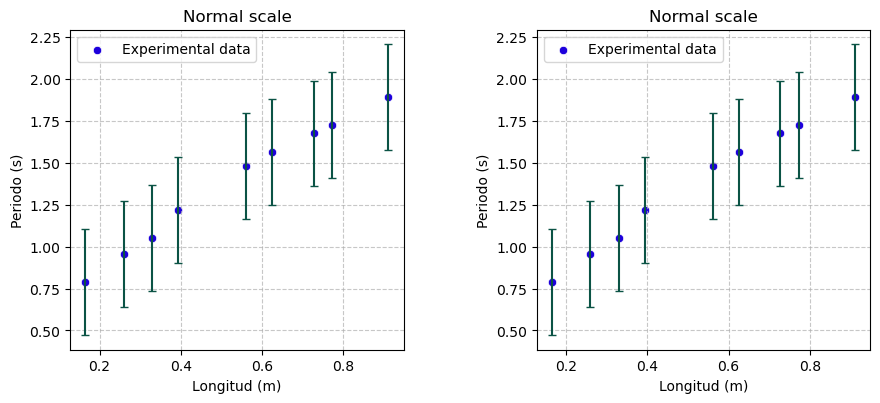

In [214]:
plt.figure(figsize=(10,4))

plt.subplot(121)

graph(periodos, x='l (m)', y='T (s)', errorbar=True, x_label='Longitud (m)', y_label='Periodo (s)', log_scale=False)

plt.subplot(122)
graph(periodos, x='l (m)', y='T (s)', errorbar=True, x_label='Longitud (m)', y_label='Periodo (s)', log_scale=False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)



3. Hacer un ajuste lineal a los datos usando las expresiones del método de mínimos cuadrados.

Durante el proceso de análisis de un péndulo simple, empleamos el logaritmo natural (ln), aunque es importante destacar que cualquier base de logaritmo podría utilizarse con igual validez. Esta elección se realiza para simplificar la expresión matemática y facilitar la linealización de la relación entre el período $T$ y la longitud del péndulo $l$.

Entendemos que en un péndulo simple, especialmente cuando se trata de ángulos pequeños, podemos obtener una estimación bastante precisa del período del péndulo utilizando la fórmula:

$$T = \frac{2\pi}{\sqrt{g}} \cdot \sqrt{l}$$

la cual también puede ser reescrita en la forma general $T(l) = c \cdot l^n$. Aquí, la constante $c$ se relaciona con $\frac{2\cdot \pi}{\sqrt{g}}$, que permanece constante en el contexto del experimento, y $l^n$ es otra manera de expresar la raíz cuadrada.

Dado que ahora tenemos nuestra expresión en esta forma general, podemos linealizarla utilizando propiedades de logaritmos de la siguiente manera:

$$ln{T} = \ln{C\cdot l^n}$$

$$ln{T} = \ln{C} + \ln{l^n},$$

$$ln{T} = \ln{C} + n \cdot \ln{l}$$

Esta representación se ajusta al formato de una ecuación lineal $y = mX + b$

Esto nos permite regresar de manera sencilla a la forma original de la relación entre el período y la longitud del péndulo, que es \(T = c \cdot l^n\). En este contexto, es evidente que el exponente $n$ es igual al valor $m$ obtenido anteriormente.

Adicionalmente, podemos relacionar el término $n{C}$ con $b$ de la siguiente manera:

$ln{C} = b \Leftrightarrow e^b = C$, de dónde  $C= \frac{2\pi}{\sqrt{g}}$, así después de un ajuste lineal, $g = \frac{4\pi^2}{C^2} = \frac{4\pi^2}{e^{2b}}$

Considerando que la base del logaritmo es la constante \(e\), podemos modelar la función de la relación entre el período \(T\) y la longitud \(l\) del péndulo como:

$T = e^b \cdot l^m$

Este enfoque simplifica la comprensión y el ajuste de los datos experimentales, permitiéndonos describir de manera precisa la relación entre el período y la longitud del péndulo.

In [191]:
df = periodos_ln.copy()

df.rename(columns={'l (m)':'x', 'T (s)':'y'}, inplace=True)

# - Create columns x^2 and xy -
df['x2'] = df.apply(np.square, columns=['x'])['x']
df['xy'] = df['x']*df['y']

N = df.shape[0] # - Lenght of data -

sigma = df.sum() # - sum of all data -

# - Minimun squares method -
m = ((N*sigma.xy - sigma.x*sigma.y) / (N*sigma.x2 - sigma.x**2))
b = ((sigma.x2*sigma.y - sigma.x*sigma.xy) / (N*sigma.x2 - sigma.x**2))

# - function model -
T = lambda l: np.exp(b)*(l**m) 


4. Use propagación de la incertidumbre para determinar el valor de la aceleración con su incertidumbre.

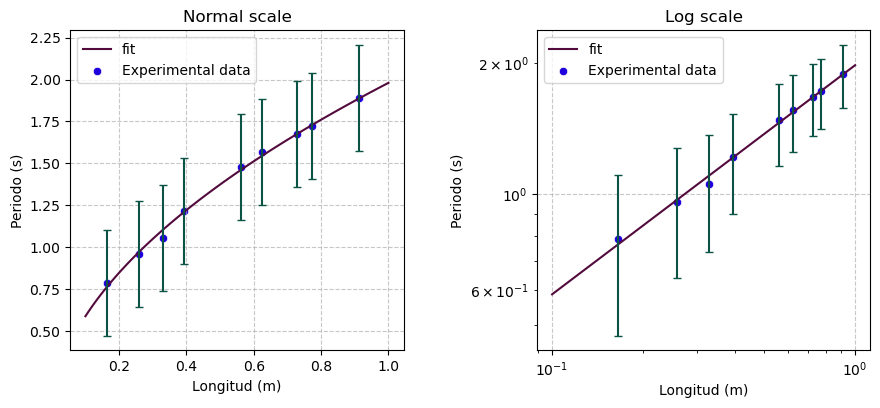

g = (10.07 ±  0.02) m/s^2


In [213]:
def line_T(x_min, x_max):
    rango = np.linspace(x_min, x_max, 100)
    sns.lineplot(x=rango, y=T(rango), color='#530B3D', label='fit')

plt.figure(figsize=(10,4))

plt.subplot(121)
line_T(0.1, 1)
graph(periodos, x='l (m)', y='T (s)', errorbar=True, x_label='Longitud (m)', y_label='Periodo (s)', log_scale=False)

plt.subplot(122)
line_T(0.1, 1)
graph(periodos, x='l (m)', y='T (s)', errorbar=True, x_label='Longitud (m)', y_label='Periodo (s)', log_scale=True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()

#  -- Incertidumbre común --

df_copy = df.apply(np.exp).copy() #Data as arrays

diference = df_copy.y - T(df_copy.x.values) #y_i - (x_i -c_i) // expected - prediction 
 
alpha = np.sqrt((1/(len(diference) -2)) * sum(diference**2))

g = (2*np.pi/np.exp(b))**2

print(f'g = ({np.round(g,2)} ±  {np.round(alpha, 2)}) m/s^2')